In [34]:
import cvxpy as cp
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

import helper_functions as hf
import importlib
importlib.reload(hf)

<module 'helper_functions' from '/home/lema/Documents/diplomska/dai/helper_functions.py'>

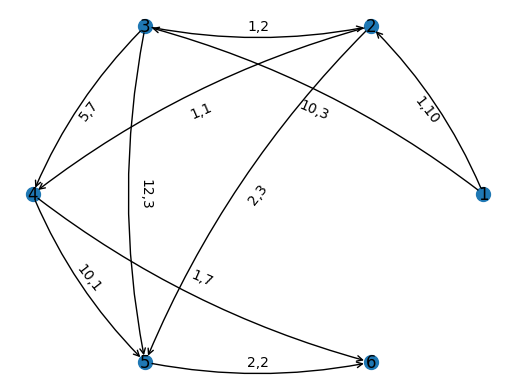

In [4]:
# dolocis podatke: graf, cene, kapacitete, povpraševanja
edges = [(1,2),(1,3),(3,2),(2,4),(2,5),(3,4),(3,5),(4,5),(4,6),(5,6)]
c = [1,10,1,1,2,5,12,10,1,2]
cap = [10,3,2,1,3,7,3,1,7,2]
H = [[1,3,2],
     [0,0,0],
     [0,0,0],
     [-1,0,0],
     [0,-3,0],
     [0,0,-2]
     ]

c_dict = dict(zip(edges, c))
cap_dict = dict(zip(edges, cap))

# konstruiraš graf iz podatkov
graph = nx.DiGraph()
graph.add_edges_from(edges)



nx.set_edge_attributes(graph, c_dict,"c")
nx.set_edge_attributes(graph, cap_dict,"cap")


hf.plot_multigraph(graph,with_labels=True)

# razberem dimenzije
n = len(graph.nodes()) # 6 # |V|
m = len(graph.edges()) # 10 # |E|
t = len(H[0]) # 3
mt = m * t # 30
nt = n * t # 18

In [3]:
# # spremenljivke
# X = cp.Variable((m,t),integer=False)

# # parametri
# c = cp.Parameter(m)
# cap = cp.Parameter(m)
# B = cp.Parameter((n,m))
# H = cp.Parameter((n,t))

# # dolocim vrednosti parametrom
# c.value = np.array([data["c"] for _,_, data in graph.edges(data=True)])
# cap.value = np.array([data["cap"] for _,_, data in graph.edges(data=True)])
# print(c)
# print(cap)
# B.value = -1 * np.array(nx.incidence_matrix(graph,oriented=True).todense())
# H.value = np.array([[1, 3, 2],
#                     [0, 0, 0],
#                     [0, 0, 0],
#                     [-1, 0, 0],
#                     [0, -3, 0],
#                     [0, 0, -2]
#                     ])

# # kriterijska funkcija
# obj = cp.Minimize(c.T @ cp.sum(X,axis=1))

# # omejitve
# constraints = [
#     cp.sum(X,axis=1) <= cap,
#     B @ X == H,
#     X >= 0      
# ]

# prob = cp.Problem(obj, constraints)

# prob.solve()
# print("status:", prob.status)
# print("optimal value", prob.value)
# print("optimal var", X.value)

# # resimo pri drugačnih parametrih
# # c.value = [1 for _,_, data in graph.edges(data=True)]

# # prob.solve()
# # print("status:", prob.status)
# # print("optimal value", prob.value)
# # print("optimal var", X.value)

param2
param3
status: optimal
optimal value 42.99999999852295
optimal var [[ 3.65937601e-01  3.00000000e+00  6.34062399e-01]
 [ 6.34062399e-01 -2.52029135e-11  1.36593760e+00]
 [ 3.65937601e-01  8.78696689e-11  6.34062399e-01]
 [ 2.36785365e-11  3.00000000e+00  4.79022656e-11]
 [-1.94891178e-11 -1.11496235e-11 -5.23399932e-11]
 [ 6.34062399e-01  7.32948972e-12  1.36593760e+00]
 [ 1.07462273e-12 -2.13191426e-11 -1.72738642e-11]
 [-3.72514962e-11  6.56303044e-11 -4.67963447e-11]
 [ 1.30168375e-11  2.95746579e-11  2.00000000e+00]
 [-1.27191303e-11 -2.94115654e-11 -1.63374788e-11]]


In [5]:
# # spremenljivke
# x = cp.Variable(mt,integer=True)

# # parametri
# c = cp.Parameter(m)
# cap = cp.Parameter(m)
# B_ = cp.Parameter((nt,mt))
# h = cp.Parameter(nt)
# M = cp.Parameter((m,mt))
# lam = cp.Parameter(m)

# # dolocim vrednosti parametrom
# c.value = np.array([data["c"] for _,_, data in graph.edges(data=True)])
# cap.value = np.array([data["cap"] for _,_, data in graph.edges(data=True)])

# B = -1 * np.array(nx.incidence_matrix(graph,oriented=True).todense())
# B_.value = np.tile(B,(t,t))
# h.value = np.array([[1, 3, 2],
#                     [0, 0, 0],
#                     [0, 0, 0],
#                     [-1, 0, 0],
#                     [0, -3, 0],
#                     [0, 0, -2]
#                     ]).flatten(order="F")
# M.value = np.tile(np.eye(m),(1,t))
# lam.value = np.ones(m)
# # kriterijska funkcija
# obj = cp.Maximize(-c.T @ M @ x + lam @ (cap - M @ x))

# # omejitve
# constraints = [
#     B_ @ x == h,
#     x >= 0 
# ]

# prob = cp.Problem(obj, constraints)

# prob.solve()
# print("status:", prob.status)
# print("optimal value", prob.value)
# print("optimal var", x.value)

In [9]:
# vp = {"X":X,"c":c,"cap":cap,"B":B,"H":H,"lam":lam}
vp = {}
# spremenljivke
vp["X"] = cp.Variable((m,t),integer=True)

# parametri
vp["c"] = cp.Parameter(m, integer=True)
vp["cap"] = cp.Parameter(m, integer = True)
vp["B"] = cp.Parameter((n,m), integer = True)
vp["H"] = cp.Parameter((n,t), integer= True)
vp["lam"] = cp.Parameter(m, nonneg=True)

# dolocim vrednosti parametrom
vp["c"].value = np.array([data["c"] for _,_, data in graph.edges(data=True)])
vp["cap"].value = np.array([data["cap"] for _,_, data in graph.edges(data=True)])
print(c)
print(cap)
vp["B"].value = -1 * np.array(nx.incidence_matrix(graph,oriented=True).todense())
vp["H"].value = np.array([[1, 3, 2],
                    [0, 0, 0],
                    [0, 0, 0],
                    [-1, 0, 0],
                    [0, -3, 0],
                    [0, 0, -2]
                    ])
vp["lam"].value = np.zeros(m)



# kriterijska funkcija
obj = cp.Minimize(vp["c"].T @ cp.sum(vp["X"],axis=1) + vp["lam"] @ (cp.sum(vp["X"],axis=1) - vp["cap"]))

# omejitve
constraints = [
    vp["B"] @ vp["X"] == vp["H"],
    vp["X"] >= 0   
]

prob = cp.Problem(obj, constraints)
print(prob.is_dpp())

prob.solve()
print("status:", prob.status)
print("optimal value", prob.value)
print("optimal var", vp["X"].value)


# resimo pri drugačnih parametrih
# c.value = [1 for _,_, data in graph.edges(data=True)]

# prob.solve()
# print("status:", prob.status)
# print("optimal value", prob.value)
# print("optimal var", X.value)

[1, 10, 1, 1, 2, 5, 12, 10, 1, 2]
[10, 3, 2, 1, 3, 7, 3, 1, 7, 2]
False
status: optimal
optimal value 17.0
optimal var [[ 1.  3.  2.]
 [-0.  0.  0.]
 [ 1. -0.  2.]
 [-0.  3. -0.]
 [-0. -0. -0.]
 [-0. -0. -0.]
 [-0.  0. -0.]
 [-0.  0. -0.]
 [ 0.  0.  2.]
 [-0. -0.  0.]]


/home/lema/.local/lib/python3.10/site-packages/cvxpy/reductions/solvers/solving_chain.py:200: UserWarning: You are solving a parameterized problem that is not DPP. Because the problem is not DPP, subsequent solves will not be faster than the first one. For more information, see the documentation on Discplined Parametrized Programming, at
	https://www.cvxpy.org/tutorial/advanced/index.html#disciplined-parametrized-programming
  warnings.warn(dpp_error_msg)


In [20]:
class Node:
    EPSI = 10e-11
    label = 0
    def __init__(self, obj, constraints, vp, level = 0):
        self.problem = cp.Problem(obj, constraints)
        self.vp = vp
        self.sol = None
        self.children = None
        
        self.level = level
        self.label = Node.label
        Node.label += 1
        
    
    def solve(self,UB):
        sol = {"zLD":-np.inf,"status":None,"X":None,"lam":None}
        for t in range(50):
            # rešimo LD pri neki lambdi
            # TODO reši LD bolj učinkovito     
            self.problem.solve()
            
            # če LD slučajno ni rešljiv, bomo šli ven že v 1. koraku
            # to je ko pogojem o ohranitvi toka ne more bit zadoščeno
            if self.problem.status == "infeasible":
                raise("conservation of flow constraint couldn't be satisfied at LD - infeasible")
                break
            
            if self.problem.status == "unbounded":
                raise("LD - unbounded")
                break
            
            # zapomnimo si najtesnejšo (najvišjo) rešitev LD
            if self.problem.value > sol["zLD"]:
                sol = {"zLD":self.problem.value,"status":self.problem.status,"X":self.vp["X"].value,"lam":self.vp["lam"].value}
            
            
            # subgradient
            s = self.vp["cap"].value - np.sum(self.vp["X"].value,axis=1)
            if np.linalg.norm(s) == 0:
                raise("miracle: s == 0")
                return
            # izberemo korak (nalivno ali op)
            # alpha = 1/(t+1)
            if UB == np.inf: 
                alpha = 1/(t+1)
            else:
                alpha = 1/(t+1) * (UB - self.problem.value)/np.linalg.norm(s)**2  # TODO
                # alpha = self.vp["lam"].value * (UB - self.problem.value)/np.linalg.norm(s)**2
                
                # alpha[alpha > 1] = 1
                # print("alpha: ", alpha)
            
            ll = self.vp["lam"].value - s * alpha
            ll[ll < 0] = 0 # lambda ne mora biti negativna
            self.vp["lam"].value = ll
        
        #hf.plot_solution_graph(graph,sol["X"])
        # print("status:", sol["status"])
        # print("optimal value zLD", sol["val"])
        # print("lambda:", sol["lam"])
        # print("optimal var x", sol["X"])
        sol["s"] = s = self.vp["cap"].value - np.sum(sol["X"],axis=1)
        sol["z"] = self.vp["c"].value.T @ np.sum(sol["X"],axis=1)
        sol["cap_ok"] = np.all(np.sum(sol["X"],axis=1) <= self.vp["cap"].value)
        
        self.sol = sol

    
    def get_children(self):
        X = self.sol["X"]
        s = self.sol["s"]
        # ce jih ze imamo
        if self.children is not None:
            return self.children
        
        # preverimo, če so že vse celoštevilske
        # if np.all(np.abs(X - np.round(X)) < Node.EPSI): # vsi blizu celih
        #     self.children = []
        # else:
        
        # vejamo po spremenljivki, z največjim necelim delov PR 0.56 > 0,03
        # a,k = np.unravel_index(np.argmax(X % 1), )
        
        # random
        # a,k = np.unravel_index(np.random.randint(0,X.shape[0]*X.shape[1]),X.shape)
       
        # vejamo po spremenljivki glede na subgradient
        a = np.argmax(s)
        k = np.random.randint(0,X.shape[1])
        
        self.sol["vejanje"] = (a,k)
        val = X[a,k]
        
        constraints1 = self.problem.constraints + [self.vp["X"][a,k] <= np.floor(val)]
        constraints2 = self.problem.constraints + [self.vp["X"][a,k] >= np.ceil(val)]
        
        ch1 = Node(self.problem.objective,constraints1,vp,level=self.level+1)
        ch2 = Node(self.problem.objective,constraints2,vp,level=self.level+1)
        
        self.children = [ch1,ch2]
        
        return self.children
    
    def __str__(self, level=0):
        ret = "\t"*level+repr(self)+"\n"
        if self.children is not None:
            for child in self.children:
                ret += child.__str__(level+1)
        return ret
    
    def __repr__(self):
        if self.sol is None: return str(self.label) +": not available"
        stri = str(self.label) +" "+ self.sol["status"]+" z: "+ str(self.sol["z"])+" zLD: "+ str(self.sol["zLD"]) + "cap_ok = " + str(self.sol["cap_ok"])
        if "vejanje" in self.sol: stri += repr(self.sol["vejanje"])
        return stri

In [28]:
# UB = np.inf
# LB = -np.inf
# n1 = Node(obj,constraints,vp)
# n1.solve()
# LB = max(LB,n1.sol["val"])
# [n2,n3] = n1.get_children()
# n2.solve()
# n3.solve()
# print(n1)

/home/lema/.local/lib/python3.10/site-packages/cvxpy/reductions/solvers/solving_chain.py:200: UserWarning: You are solving a parameterized problem that is not DPP. Because the problem is not DPP, subsequent solves will not be faster than the first one. For more information, see the documentation on Discplined Parametrized Programming, at
	https://www.cvxpy.org/tutorial/advanced/index.html#disciplined-parametrized-programming
  warnings.warn(dpp_error_msg)


0 optimal z: 17.0 zLD: 42.99745067762697cap_ok = False(5, 0)
	1 optimal FEASIBLE for I OPTIMAL for I z: 43.0 zLD: 43.0cap_ok = True
	2 optimal COST too large z: 56.0 zLD: 42.99211040779592cap_ok = True

optimal:  43.0 array([[ 1.,  3.,  0.],
       [-0.,  0.,  2.],
       [ 1., -0., -0.],
       [-0.,  3.,  0.],
       [ 0., -0., -0.],
       [-0., -0.,  2.],
       [-0.,  0., -0.],
       [-0.,  0., -0.],
       [ 0.,  0.,  2.],
       [-0., -0., -0.]])
LB_best:  43.0
[ True  True  True  True  True  True  True  True  True  True]
43.0
k	COLOR
0 	 b
1 	 r
2 	 g


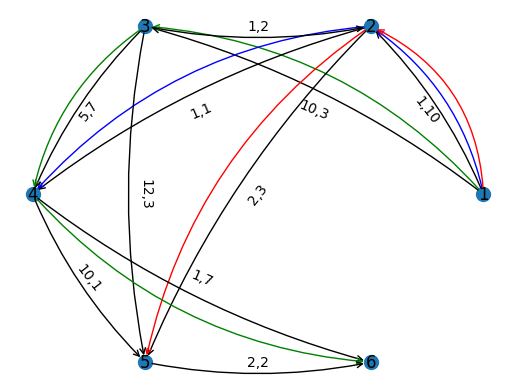

In [36]:
# import random
# from datetime import datetime 

# seed = datetime.now().microsecond
# print("seed: ", seed)
# random.seed(seed)
# random.seed(817649)

X_best = None
UB = np.inf # celostevilski
LB_best = None
Node.label = 0
n1 = Node(obj,constraints,vp)
# L = set([n1])
L = [n1]

q = 0
while len(L) > 0:
    n = L.pop(0) #FIFO

    n.solve(UB)
    zLD = n.sol["zLD"]
    # z = c.value.T @ np.sum(n.sol["X"],axis=1) # minimiziran strošek
    z = n.sol["z"]
    
    if z > UB: # ta veja bo samo še slabša (dražja)
        n.sol["status"] += " COST too large"
        continue
    
    # if np.all(np.sum(n.sol["X"],axis=1) <= cap.value): # dopustna za prvotni CLP
    if n.sol["cap_ok"]: # dopustna za prvotni CLP
        if z < UB:
            UB = z
            X_best = n.sol["X"]
            LB_best = zLD
        n.sol["status"] += " FEASIBLE for I"
        if z == zLD:
            n.sol["status"] += " OPTIMAL for I"
            # break
            continue
    
    ch = n.get_children()
    # L.update(ch)
    L += ch
    q += 1
    if q >= 30: break
        
print(n1)
print(f"optimal: ", UB, repr(X_best))
print("LB_best: ", LB_best)
print(np.sum(X_best,axis=1) <= vp["cap"].value)
print(vp["c"].value.T @ np.sum(X_best,axis=1))
hf.plot_solution_graph(graph,X_best)

In [121]:
X3 = n3.sol["X"]
print(np.sum(X3,axis=1) <= cap.value,
B.value @ X3 == H.value,
X3 >= 0)

c.value.T @ np.sum(X3,axis=1)

[ True  True  True  True  True  True  True  True  True  True] [[ True  True  True]
 [ True  True  True]
 [ True  True  True]
 [ True  True  True]
 [ True  True  True]
 [ True  True  True]] [[ True  True  True]
 [ True  True  True]
 [ True  True  True]
 [ True  True  True]
 [ True  True  True]
 [ True  True  True]
 [ True  True  True]
 [ True  True  True]
 [ True  True  True]
 [ True  True  True]]


43.0

In [ ]:
L = set(Node(obj,constraints))
while len(L) > 0:
    # izberi node za obdelavo
    n1 = L[0]
    # reši
    n1.solve()
    

In [39]:
v = np.array([[0.45,1.34,23],[2,3,66]])
ind = np.argmin(v)
i = ind//(v.shape[0])
j = ind%(v.shape[0])
print(ind,i,j)
v[i,j]


0 0 0


0.45